### Rakamin - Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('online_retail_II.csv')

In [5]:
df.shape

(577334, 8)

In [6]:
# melihat info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577334 entries, 0 to 577333
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      577334 non-null  object 
 1   StockCode    577333 non-null  object 
 2   Description  574255 non-null  object 
 3   Quantity     577333 non-null  float64
 4   InvoiceDate  577333 non-null  object 
 5   Price        577333 non-null  float64
 6   Customer ID  450568 non-null  float64
 7   Country      577333 non-null  object 
dtypes: float64(3), object(5)
memory usage: 35.2+ MB


## Section 1

### Create New Feature: Year

In [7]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
year = df

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0


### Filtering Data

In [8]:
sales = year[year['Quantity'] > 0 & df['Invoice'].str.contains('C')]
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0


### Create New Feature: Revenue

In [9]:
sales['Revenue'] = sales['Quantity'] * sales['Price'] 
sales.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0,30.0


### Average of Revenue per Year

In [10]:
sales.groupby('year')['Revenue'].mean().reset_index()

,year,Revenue
0,2009.0,18.713273
1,2010.0,19.909680
2,2011.0,17.081873


In [11]:
import matplotlib.pyplot as plt

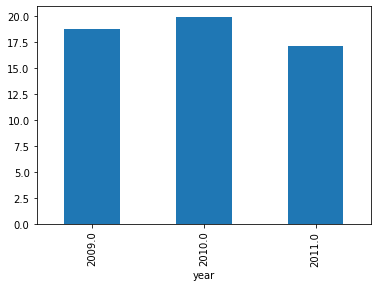

In [12]:
sales.groupby('year')['Revenue'].mean().plot(kind='bar', legend=False)

### Interpretation



```
# This is formatted as code
```
**Terjadi kenaikan Revenue pada tahun 2009 sampai 2010.**
**Pada tahun ke 2010 sampai 2011 cenderung Temat.**



## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [16]:
#  data sales (data yang sudah di filter pada section 1) dengan ketentuan CustomerID tidak boleh kosong atau null
finished = sales[sales['Customer ID'] != None]
finished.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0,30.0


In [25]:
finished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563981 entries, 0 to 577332
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      563981 non-null  object 
 1   StockCode    563981 non-null  object 
 2   Description  562810 non-null  object 
 3   Quantity     563981 non-null  float64
 4   InvoiceDate  563981 non-null  object 
 5   Price        563981 non-null  float64
 6   Customer ID  439842 non-null  float64
 7   Country      563981 non-null  object 
 8   year         563981 non-null  float64
 9   Revenue      563981 non-null  float64
dtypes: float64(5), object(5)
memory usage: 47.3+ MB


#### Customers who canceled their purchases

In [64]:
# kelompok pelanggan yang dibatalkan belanjanya
cancel = df[df['Invoice'].str.contains('C')]
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia,2009.0
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6.0,2009-12-01 10:33:00,1.65,16321.0,Australia,2009.0
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4.0,2009-12-01 10:33:00,4.25,16321.0,Australia,2009.0
181,C489449,21896,POTTING SHED TWINE,-6.0,2009-12-01 10:33:00,2.10,16321.0,Australia,2009.0
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia,2009.0


In [65]:
cancel.shape

(11137, 9)

### Number of Finished and Canceled Transactions Each Year

In [75]:
finished.groupby('year')['Price'].count()

year
2009.0     44123
2010.0    510695
2011.0      9163
Name: Price, dtype: int64

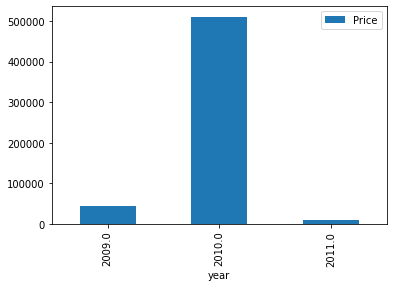

In [76]:
finished.groupby('year')['Price'].count().plot(kind='bar', legend=True)

In [77]:
cancel.groupby('year')['Price'].count()

year
2009.0    1015
2010.0    9919
2011.0     203
Name: Price, dtype: int64

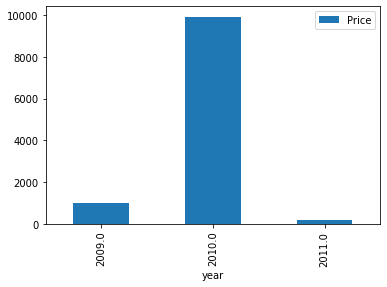

In [78]:
cancel.groupby('year')['Price'].count().plot(kind='bar', legend=True)

### Cancellation Rate

In [70]:
a, b = cancel.shape
c, d = df.shape
print((a/c)*100)

1.9290393429106896


## Perbandingan cancel dan finished per tahun

In [86]:
print('Tahun 2009 : ' + str(1015/44123))
print('Tahun 2010 : ' + str(9919/510695))
print('Tahun 2011 : ' + str(203/9163))

Tahun 2009 : 0.023003875529769055
Tahun 2010 : 0.019422551620830435
Tahun 2011 : 0.02215431627196333


### Interpretation

Kurva Customer yang belanja(finished) pada tahun 2009 dan 2011 berbanding terbalik dengan Cancel.[teks link](https://)

Cancellation Rate menjadi persentasi terbesar dibanding persentasi cancel dan finished per tahun